In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import json

In [2]:
rutas_archivos = [
    'Google/reviews-estados/review-Texas/1.json',
    'Google/reviews-estados/review-Texas/2.json',
    'Google/reviews-estados/review-Texas/3.json',
    'Google/reviews-estados/review-Texas/4.json',
    'Google/reviews-estados/review-Texas/5.json',
    'Google/reviews-estados/review-Texas/6.json',
    'Google/reviews-estados/review-Texas/7.json',
    'Google/reviews-estados/review-Texas/8.json',
    'Google/reviews-estados/review-Texas/9.json',
    'Google/reviews-estados/review-Texas/10.json',
    'Google/reviews-estados/review-Texas/11.json',
    'Google/reviews-estados/review-Texas/12.json',
    'Google/reviews-estados/review-Texas/13.json',
    'Google/reviews-estados/review-Texas/14.json',
    'Google/reviews-estados/review-Texas/15.json',
    'Google/reviews-estados/review-Texas/16.json',
]

In [3]:
todos_los_datos = []
# Iterar a través de cada archivo en la lista de rutas
for ruta_archivo in rutas_archivos:
    # Leer cada línea del archivo JSON
    with open(ruta_archivo, 'r') as f:
        for linea in f:
            # Cargar cada línea como un objeto JSON individual
            datos_json = json.loads(linea)
            # Agregar los datos al lista
            todos_los_datos.append(datos_json)


In [4]:
# Convertir a DataFrame de pandas
df_Texas = pd.json_normalize(todos_los_datos)

In [5]:
df_Texas.head()

,user_id,name,time,rating,text,pics,resp,gmap_id,resp.time,resp.text
0,110545299078970317447,Kimberly Feger,1625431734826,5,"The pharmacist, Erin, is phenomenal. She was s...",None,NaN,0x864c3998b8d8dc83:0x57ffabe1e2322320,NaN,NaN
1,103619788097506115343,Briana Streit,1568336283913,2,I gave them 2 stars because they offer prescri...,None,NaN,0x864c3998b8d8dc83:0x57ffabe1e2322320,NaN,NaN
2,101916663109091637233,Sylvia Caudillo,1519873586872,1,If I could put minus stars I would. This has t...,None,NaN,0x864c3998b8d8dc83:0x57ffabe1e2322320,NaN,NaN
3,117870898304582507607,Ginger Kinyon,1571638384637,1,Please fix your restroom doors,None,NaN,0x864c3998b8d8dc83:0x57ffabe1e2322320,NaN,NaN
4,110397346115416712442,Angeles Arellano,1546568877087,1,This pharmacy Walmart dose not work not come a...,None,NaN,0x864c3998b8d8dc83:0x57ffabe1e2322320,NaN,NaN


In [6]:
df_Texas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296824 entries, 0 to 2296823
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    object 
 1   name       object 
 2   time       int64  
 3   rating     int64  
 4   text       object 
 5   pics       object 
 6   resp       float64
 7   gmap_id    object 
 8   resp.time  float64
 9   resp.text  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 175.2+ MB


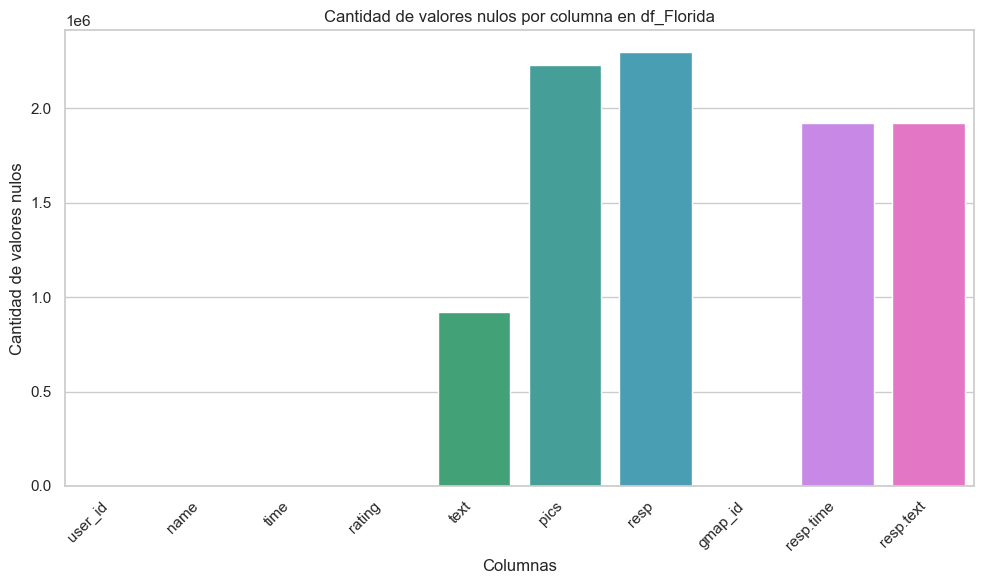

In [7]:
# Calcular el número de valores nulos en cada columna
nulos = df_Texas.isna().sum()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=nulos.index, y=nulos.values, palette='husl')
plt.title('Cantidad de valores nulos por columna en df_Florida')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observan gran cantidad de nulos en las columnas de respuestas y fotos, a continuacion la misma informacion pero en porcentage del total


In [8]:
# Calcular el número total de filas en el DataFrame
total_filas = len(df_Texas)
# Calcular el número de valores nulos en cada columna
nulos = df_Texas.isna().sum()
# Calcular los porcentajes de valores nulos en cada columna
porcentaje_nulos = (nulos / total_filas) * 100

In [9]:
porcentaje_nulos

user_id        0.000000
name           0.000000
time           0.000000
rating         0.000000
text          40.020872
pics          97.025937
resp         100.000000
gmap_id        0.000000
resp.time     83.680160
resp.text     83.680160
dtype: float64

La columna de resp, todos nulos, y pics se eliminaran debido a la poca informacion aportada. La coluna resp.time y resp.text se evaluara mas adelante debido a que puede tener influencia la tasa de respuesta de un local en el rating, ya que pueden mostrar interes en mejorar el servicio y aclarar dudas en sus potenciales clientes


Se eliminan las columnas innecesarias

In [10]:
# Eliminar las columnas 'time', 'resp' y 'pics'
df_Texas = df_Texas.drop(['resp', 'pics'], axis=1)

In [11]:
cantidad_filas_repetidas = df_Texas.duplicated().sum()
print("Cantidad de filas repetidas:", cantidad_filas_repetidas)

Cantidad de filas repetidas: 61384


Se convierte la columna time en una fecha legible para poder analizar la evolucion de las variables a travez del tiempo

In [12]:
# Convertir la columna 'time' a formato de fecha y hora
df_Texas['time'] = pd.to_datetime(df_Texas['time'], unit='ms')

# Crear una nueva columna con la fecha formateada como 'dd/mm/yyyy'
df_Texas['fecha'] = df_Texas['time'].dt.strftime('%d/%m/%Y')

In [13]:
df_Texas = df_Texas.drop(['time'], axis=1)

Se procede a evaluar los ratings

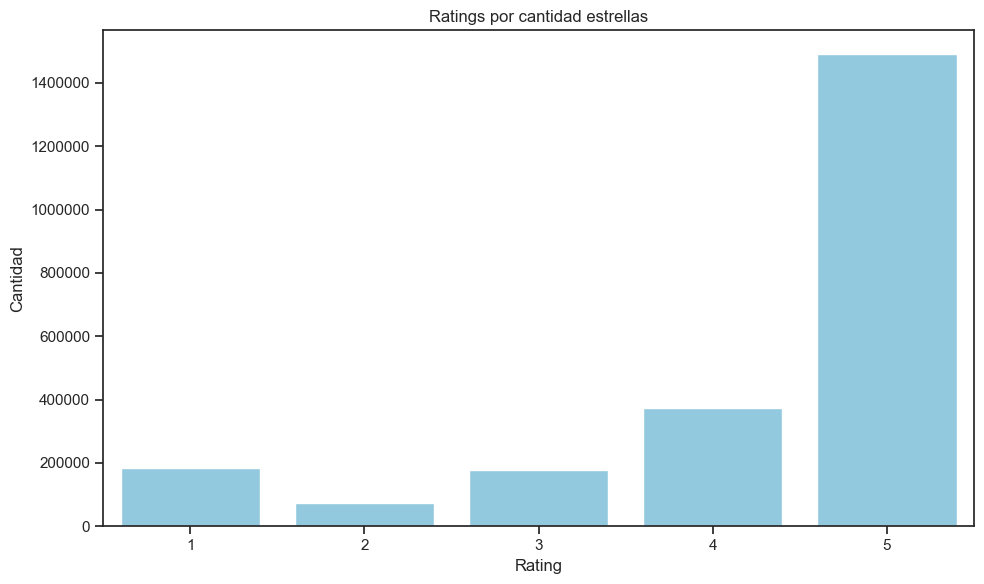

In [14]:
# Configurar el estilo de Seaborn
sns.set(style="ticks")
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_Texas, x='rating', color='skyblue')
plt.title('Ratings por cantidad estrellas')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

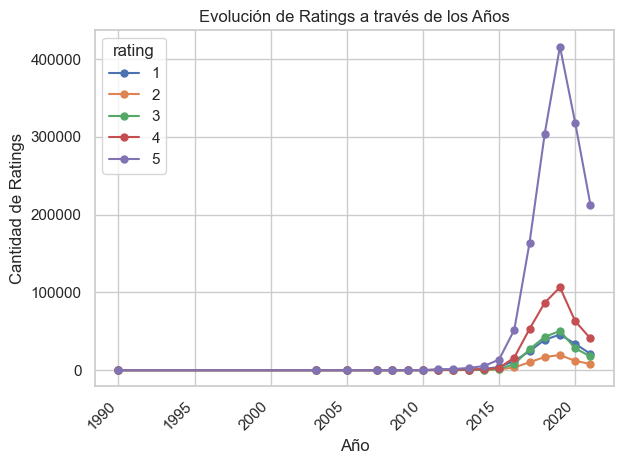

In [15]:
# Extraer el año de la columna 'fecha'
df_Texas['year'] = pd.to_datetime(df_Texas['fecha'], format='%d/%m/%Y').dt.year
# Agrupar por año y rating, y contar cuántas veces ocurre cada rating en cada año
rating_counts_by_year = df_Texas.groupby(['year', 'rating']).size().unstack(fill_value=0)
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
rating_counts_by_year.plot(kind='line', marker='o', markersize=5)
plt.title('Evolución de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observa una cola hacia la derecha en la cantidad de reseñas por lo que veremos la cantidad de reseñas por año mas adelante

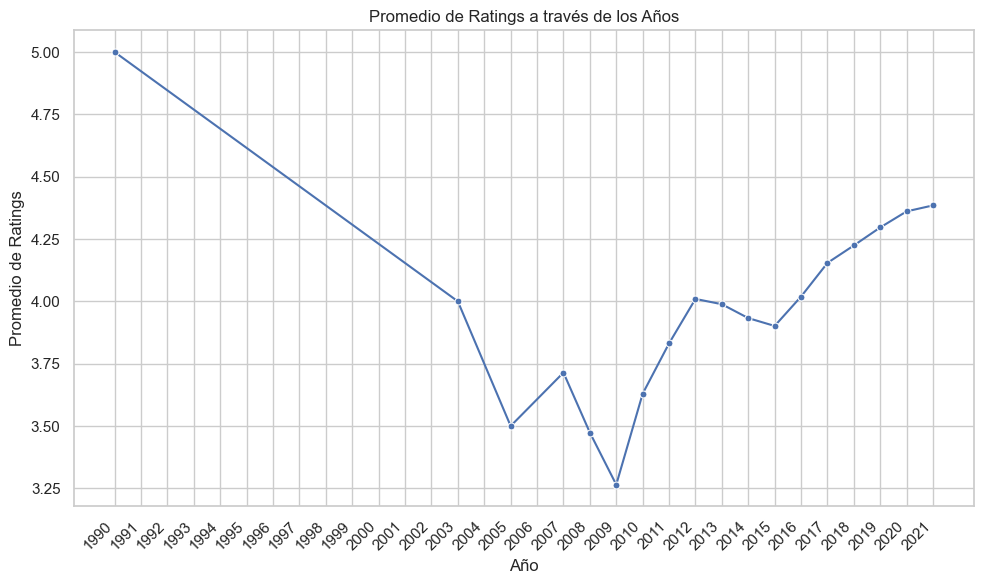

In [16]:
# Extraer el año de la columna 'fecha'
df_Texas['year'] = pd.to_datetime(df_Texas['fecha'], format='%d/%m/%Y').dt.year

# Calcular el promedio de todos los ratings para cada año
average_rating_by_year = df_Texas.groupby('year')['rating'].mean()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_by_year, marker='o', markersize=5)
plt.title('Promedio de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Promedio de Ratings')
plt.xticks(range(int(min(average_rating_by_year.index)), int(max(average_rating_by_year.index))+1), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Mas adelante evaluaremos la cantidad de datos, pero en este grafico se ven posibles outliers en los primeros años, sobre todo ese dato de 1990. Con el logico aumetno de las reseñas a lo largo de los años, vemos una estabilizacion a partir del 2012 con una tendencia creciente en la satisfaccion del cliente en general, a pesar de un leve decaimiento hasta 2015.

Procedemos a ver la cantidad de reseñas por año

In [17]:
# Extraer el año de la columna 'fecha'
df_Texas['year'] = pd.to_datetime(df_Texas['fecha'], format='%d/%m/%Y').dt.year
# Contar el número de reseñas por año
reviews_per_year = df_Texas.groupby('year').size()
# Mostrar el resultado
print(reviews_per_year)

year
1990         1
2003         1
2005         2
2007         7
2008        19
2009       102
2010       394
2011      2605
2012      2978
2013      5307
2014      9075
2015     23067
2016     91276
2017    278036
2018    489780
2019    638191
2020    455346
2021    300637
dtype: int64


Hay un constane crecimiento en la cantidad de reseñas hasta el año 2020, en el cual decrece. Esto se puede deber a la pandemia global de ese año